# tvAR2
# Gaussian Kernel
# Various h
# Fixed t=50, T=1000

In [1]:
import sys
import os

sys.path.append(os.path.abspath('D:/ExperimentsPhD/wasslsp/Jan_Experiments'))

In [2]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

# xi = 0.45 / (2*(d+1))

In [40]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

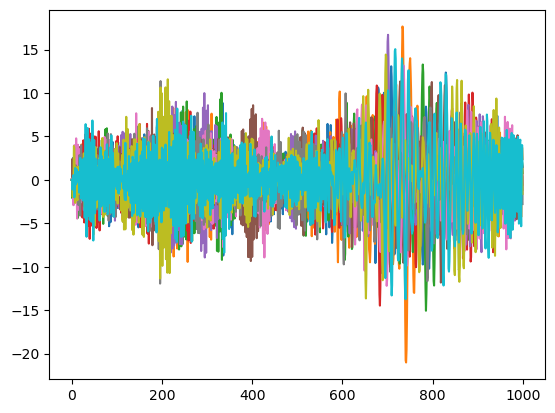

In [41]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [42]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [43]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

In [44]:
X_tvar_2_replications.shape

(200, 1000)

In [45]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

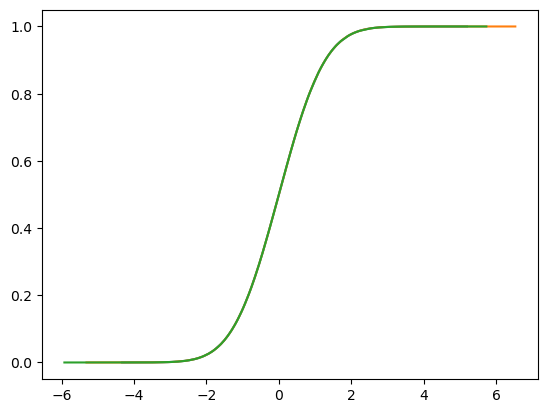

In [46]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [47]:
## Gaussian 
xi = 0.45 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [48]:
weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [49]:
weights_50['0'].shape

(1000,)

In [50]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

,0
0,6.583294e-15
1,6.584212e-15
2,6.585112e-15
3,1.172474e-20
4,7.485719e-35
5,6.374318e-35
6,2.642568e-10
7,8.261628e-08
8,7.356779e-27
9,8.200281e-32


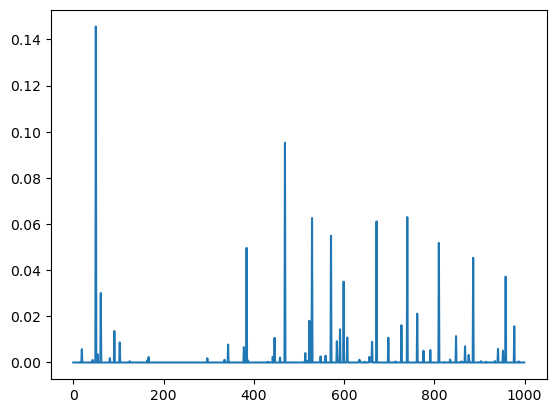

In [51]:
plt.plot(weights_50['0'])

In [52]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [53]:
weights_50['0'].shape

(1000,)

In [54]:
replicated_NW_cdfs_50['0'].shape

(1000,)

<Axes: >

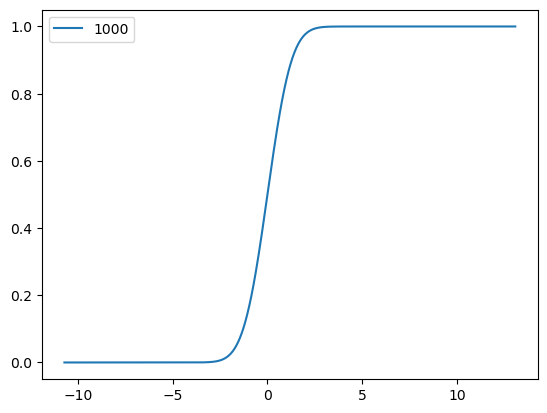

In [55]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [56]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(200, 1000) (200, 1000)


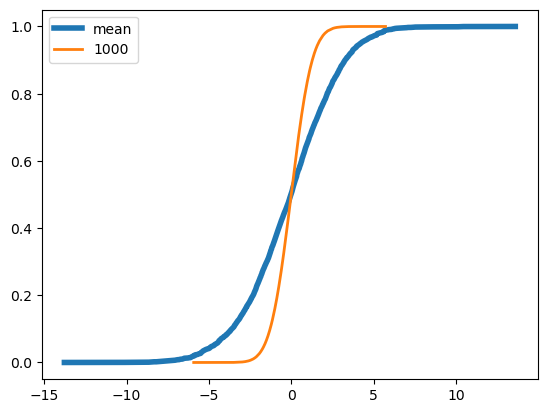

Wasserstein distance for each replication:  [0.2026626338048252, 0.21129958836517662, 0.13629993706448756, 0.16662995559387425, 0.07452529661054488, 0.017582907121433154, 0.12152041263439056, 0.09624382978166282, 0.22883029555600673, 0.2854975475271369, 0.03255828597652297, 0.12229431811801222, 0.3714481238673668, 0.1961781866278392, 0.1318465718412402, 0.019405661434614547, 0.0658490591861279, 0.11976517601981476, 0.2866702702062393, 0.03654564299178327, 0.04882506963445751, 0.028313870004381105, 0.12684648431045578, 0.09900297803385671, 0.07607102778687322, 0.12622297308185132, 0.1868541584753582, 0.2401005275044163, 0.1484743644552619, 0.268049945488562, 0.17204549728937102, 0.09993910420814725, 0.17386287762793615, 0.21041109785860426, 0.15353198563622794, 0.0642996026741782, 0.052025315787081715, 0.3424030766219593, 0.04354206608498138, 0.0669592088431477, 0.18806966673750938, 0.1731790375467687, 0.2236576740068349, 0.14511202083807773, 0.06577337284916887, 0.22435303149453378, 0.

In [57]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [58]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

In [59]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.10092686245862371

In [79]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.9868308976105993

# xi = 0.4 / (2*(d+1))

In [60]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

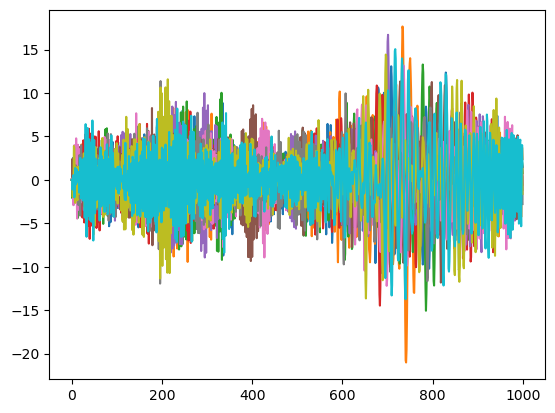

In [61]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [62]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

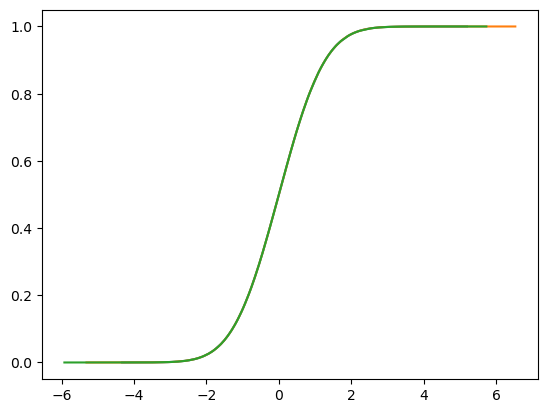

In [63]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [64]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


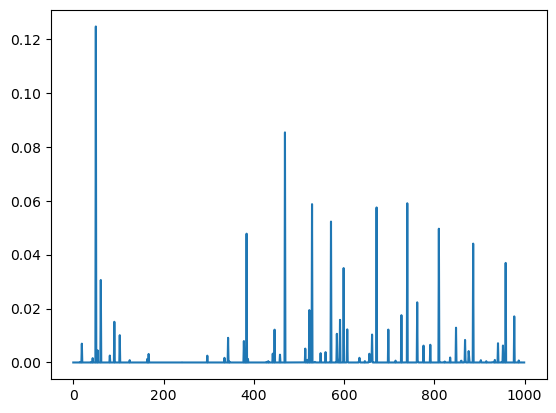

In [65]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [66]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

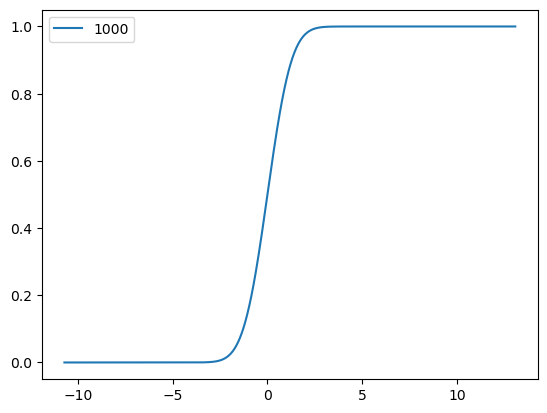

In [67]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1000) (200, 1000)


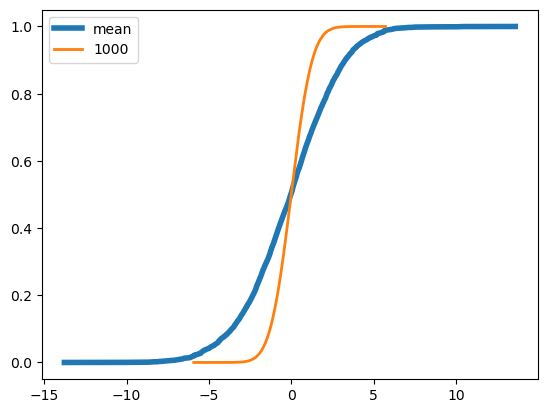

Wasserstein distance for each replication:  [0.20719433934393167, 0.2050967915841277, 0.12987257387516904, 0.172833748160503, 0.07838598442362416, 0.016694496872547065, 0.11719052168843389, 0.09358216644694242, 0.2254780170835471, 0.27909388360431325, 0.02993745747728629, 0.1241476918228342, 0.36675197711380436, 0.1932483339011053, 0.13355392342199335, 0.019315106586930166, 0.06626652082971678, 0.11491863715109316, 0.28543769245756234, 0.03496143985564728, 0.050036617456413586, 0.03006126686571438, 0.12938827540593065, 0.09743047337619815, 0.07564534770941461, 0.12189211428164562, 0.18807787002533197, 0.2378004243274419, 0.1465356845106861, 0.26753208381279064, 0.17048212666999638, 0.1043337452645309, 0.17428813421681266, 0.20856987601823165, 0.14904617054595826, 0.0637883541458155, 0.052170872685107214, 0.3407236480638456, 0.044213293822175495, 0.06500999613995682, 0.18505442665928018, 0.17026358264869731, 0.22362024493454025, 0.14022870038246554, 0.0637191658883094, 0.221168970300015

In [68]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [69]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.1010480348744105

# xi = 0.35 / (2*(d+1))

In [81]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

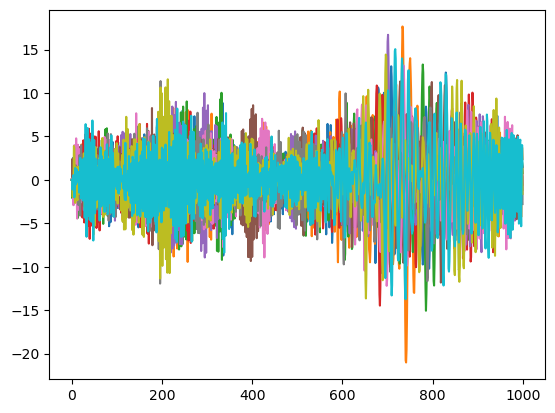

In [83]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [84]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

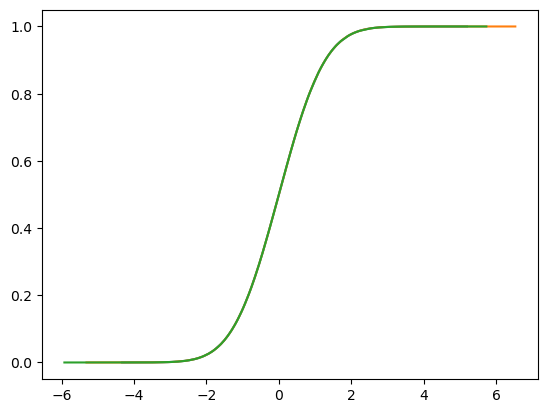

In [85]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [86]:
## Gaussian 
xi = 0.35 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


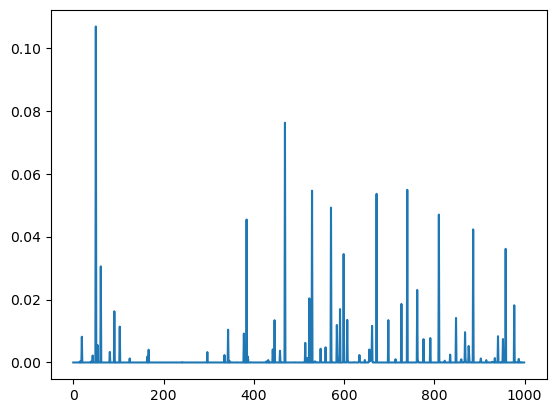

In [87]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [88]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

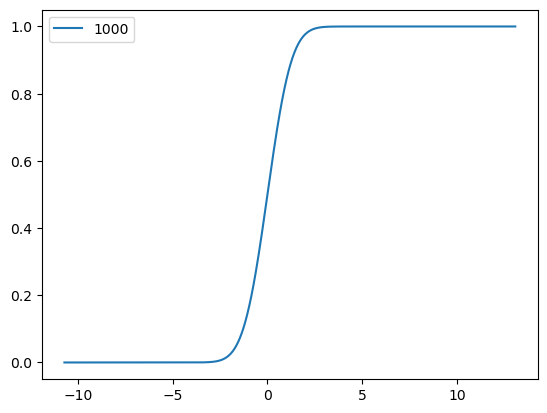

In [89]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1000) (200, 1000)


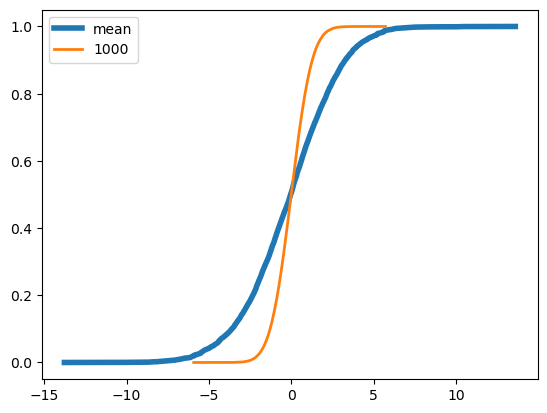

Wasserstein distance for each replication:  [0.2108282559345848, 0.1989649557337525, 0.12387069902140599, 0.17889613791611864, 0.08200475689643166, 0.016575381589693912, 0.11279932070683431, 0.0909338265620731, 0.22153119654846606, 0.2725915770302097, 0.027620752930743203, 0.12597934549086576, 0.36170857335478795, 0.19019963291007635, 0.1346317122579708, 0.019304397295731572, 0.06669199056791827, 0.11126777550499584, 0.2843733418382551, 0.0339558329997891, 0.051050603533283834, 0.03201116803797098, 0.1314011613332825, 0.09560949584356082, 0.07542282594772856, 0.11856601457320497, 0.18876417518105004, 0.2349983419387935, 0.1444704428696437, 0.26687513106329686, 0.16875899217353268, 0.10878360956823804, 0.17407253149873886, 0.2065496908107351, 0.14443498331697063, 0.06313858291965022, 0.052538907328935375, 0.3389978250701809, 0.04557592522634924, 0.06327643920461462, 0.18205552246410434, 0.16693973796821407, 0.2236799916054599, 0.1356484108097967, 0.062412298359381384, 0.2180990737704486

In [90]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [91]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.10111695117125818

# xi = 0.30 / (2*(d+1))

In [93]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

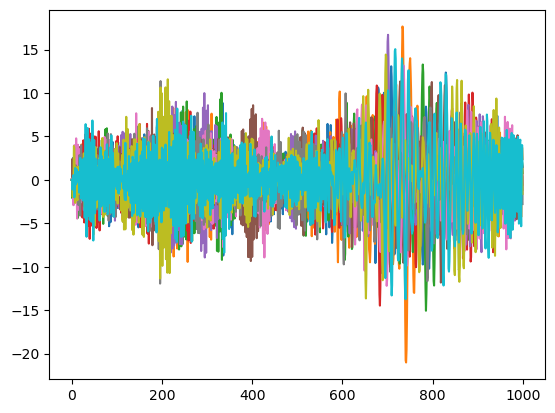

In [94]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [95]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

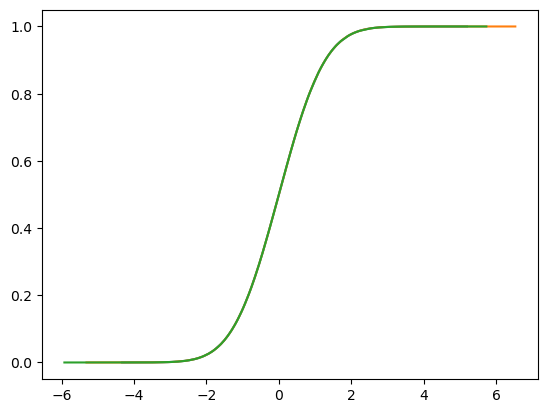

In [96]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [97]:
## Gaussian 
xi = 0.3 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


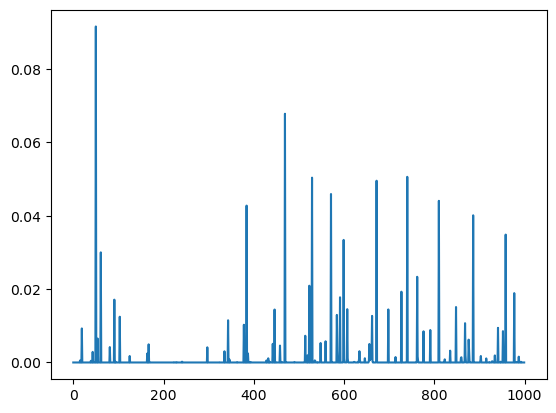

In [98]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [99]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

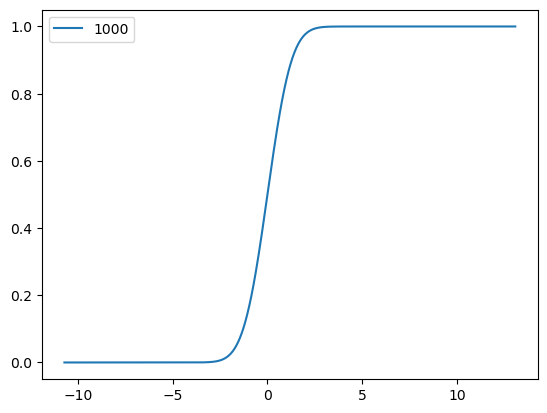

In [100]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1000) (200, 1000)


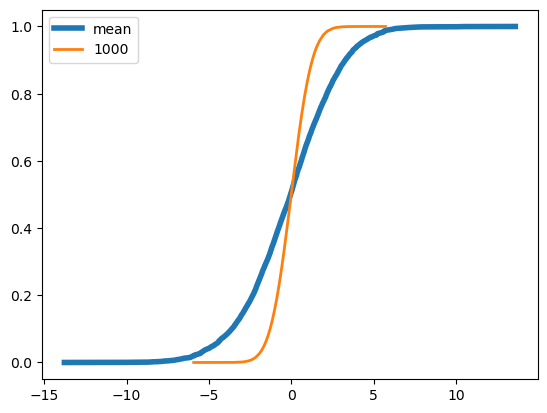

Wasserstein distance for each replication:  [0.21332279899233947, 0.1927876954529667, 0.11829438629927137, 0.18446208561566196, 0.08530290218057937, 0.017758023426639465, 0.10840247419838205, 0.08851745222199545, 0.21659330257424975, 0.2660150029221242, 0.02559624497728603, 0.12793924520353184, 0.35635655263317606, 0.18706956730105798, 0.13514114833340743, 0.019245580213611523, 0.06696039753190086, 0.10867535558558532, 0.2834247514862001, 0.03365346428413929, 0.05195947366687202, 0.03420117607787877, 0.13305556368419547, 0.0936092846717053, 0.07567735662680984, 0.11563590260932133, 0.18899733503883065, 0.2317285064853376, 0.14229594165954107, 0.266025048257119, 0.16692959186715364, 0.1127234450820408, 0.17325849632251594, 0.20434045095012027, 0.13969348821728172, 0.062309565959166105, 0.05298150908193022, 0.33716128697733744, 0.04776450815142047, 0.06178737043354257, 0.17902090221056877, 0.1631572049688323, 0.2235283168029119, 0.13127130961471284, 0.061521234562175994, 0.21517646191783

In [101]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [102]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.1011309005732021

# xi = 0.25 / (2*(d+1))

In [103]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

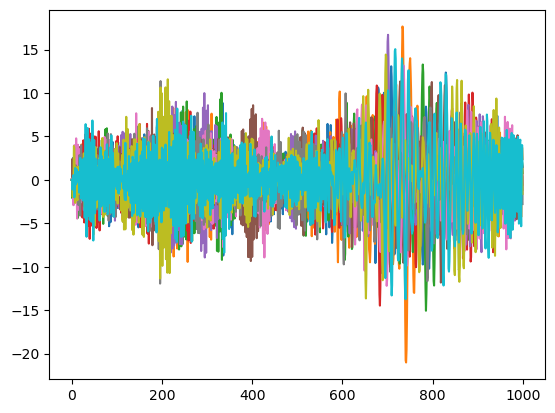

In [104]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [105]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

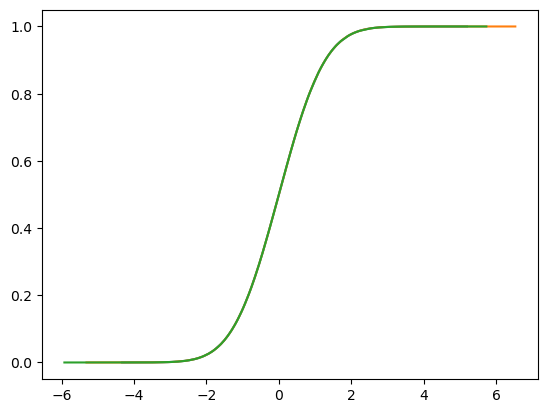

In [106]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [107]:
## Gaussian 
xi = 0.25 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


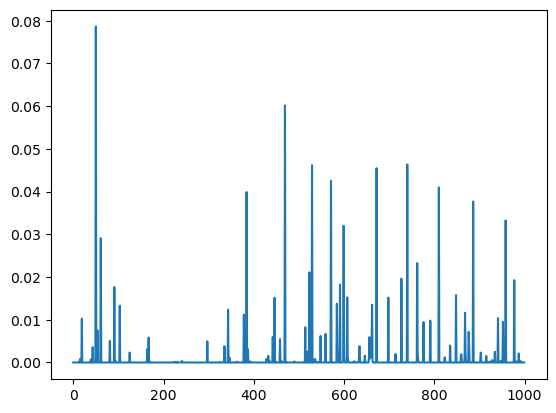

In [109]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [110]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

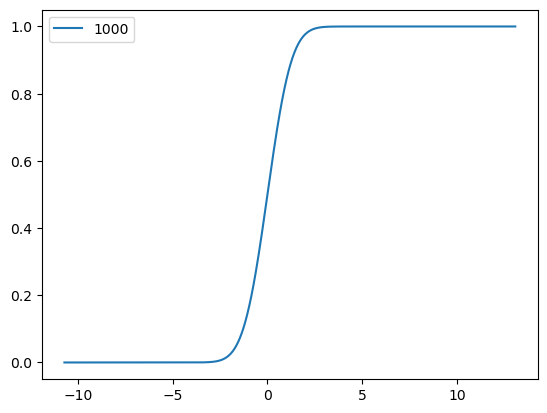

In [111]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1000) (200, 1000)


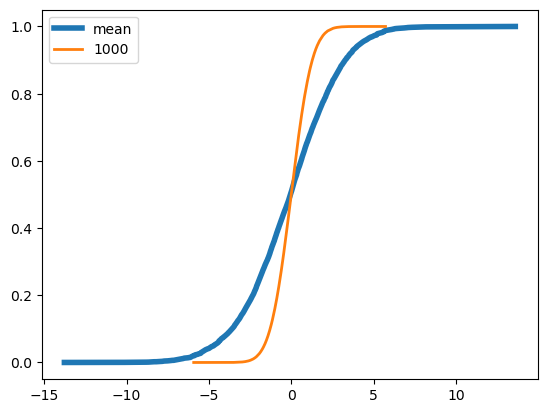

Wasserstein distance for each replication:  [0.21477801137457456, 0.1864555313421456, 0.1131221286765165, 0.1890744946097873, 0.08828030413504226, 0.019892098067213277, 0.103961601958584, 0.08642308626043, 0.21087705436375193, 0.25936741033685967, 0.02415765336943135, 0.1297261484032012, 0.35067729316818264, 0.18388915362268604, 0.13513775026584213, 0.019128408959441727, 0.06720085235722387, 0.10700261104583801, 0.28254423453085453, 0.03361585429785071, 0.05281216110259255, 0.036593246135803253, 0.13451688514454052, 0.09149755916183974, 0.07647830676872358, 0.11308110888502626, 0.18885370102170418, 0.22803250399888178, 0.14002382073885267, 0.2649262989977696, 0.16496559866367932, 0.11591169954693925, 0.17198674962374227, 0.20193209159127326, 0.1348426403820027, 0.06128268301044841, 0.053450522502527444, 0.33514500775022477, 0.05092202056327076, 0.060506411632650754, 0.1759168251826604, 0.1588865235849527, 0.22333614197462004, 0.1271160743727414, 0.060998491953406765, 0.2124117358305893

In [113]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [114]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.10108883108571143